We will use yfinance to to load SNP500 price data.

In [2]:
# import lib
import yfinance as yf

In [3]:
# ^GSPC is ticker code for SNP500
sp500 = yf.Ticker("^GSPC")

# get data from beginning of SNP500
sp500 = sp500.history(period = 'max')

sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


We are provided with many columns:
- `Open`: Market opening price
- `High`: Highest price in that trading day
- `Low`: Lowest price in that trading day
- `Close`: Market closing price
- `Volume`: Number of shares traded in a stock, or contracts traded in futuress/options
- `Dividends`: Payment to shareholders that consists of additional shares of that stock
- `Stock Splits`: when more shares are issued to current shareholders

In [5]:
# see index of snp500 data
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-16 00:00:00-04:00', '2024-07-17 00:00:00-04:00',
               '2024-07-18 00:00:00-04:00', '2024-07-19 00:00:00-04:00',
               '2024-07-22 00:00:00-04:00', '2024-07-23 00:00:00-04:00',
               '2024-07-24 00:00:00-04:00', '2024-07-25 00:00:00-04:00',
               '2024-07-26 00:00:00-04:00', '2024-07-29 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24259, freq=None)

Note: Index is the date and time of the market opening

Now, time to clean and visualise the pricing of snp500

<Axes: xlabel='Date'>

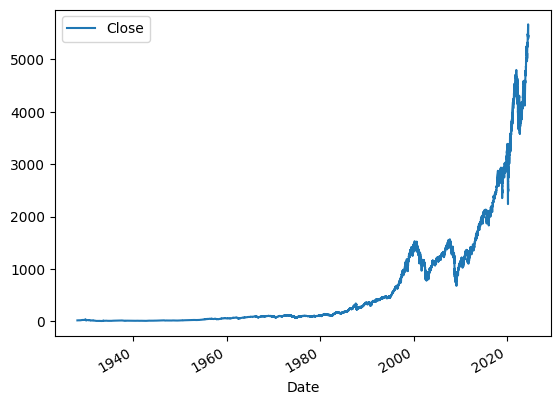

In [7]:
# plot closing price against index
import matplotlib as plt

sp500.plot.line(y = 'Close', use_index = True)

In [8]:
# Dividends and Stock Splits are more for indiv stocks, not index, so we will remove these columns
del sp500['Dividends']
del sp500['Stock Splits']

sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


### Setting up Target Variable

*Problem*: we can very accurately predict the absolute price but we can still lose a lot of money because if we are buying and selling stocks, we don't care about getting an accurate price, but rather the direction (whether it will go up or down).

Target: will stock go up/down tomorrow at closing

In [12]:
# create column for target, assign value to next day's close
sp500['Tomorrow'] = sp500['Close'].shift(-1)

# create column for Target: bool (1 for tomorrow higher than today, 0 for tomorrow lower than today)
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,5427.129883,0
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215,0
2024-07-25 00:00:00-04:00,5428.700195,5491.589844,5390.950195,5399.220215,4592120000,5459.100098,1


In stock market, data from "ancient times" don't matter much, since market structure might have evolved or shifted fundamentally. So, we will remove rows containing data any earlier than 1990.

In [13]:
sp500 = sp500.loc['1990-01-01':]

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,5427.129883,0
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215,0
2024-07-25 00:00:00-04:00,5428.700195,5491.589844,5390.950195,5399.220215,4592120000,5459.100098,1
